In [1]:
# Objective: 
# To classify a given silhouette as one of four types of vehicle, using  a set of features extracted from the 
# silhouette.The vehicle may be viewed from one of many different angles.

In [2]:
# Steps:
# 1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers 
# 2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully 
# which all attributes have to be a part of the analysis and why 
# 3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) 
# 4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the 
# best hyper parameters and do cross validation to find the accuracy. 

In [3]:
# Importing basic & necessary libraries..
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split

# Importing PCA & SVM
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

# Standard Scaler
from sklearn.preprocessing import StandardScaler

# GridSearchCV
from sklearn.model_selection import GridSearchCV

In [4]:
# Loading data from the given datafile..

In [5]:
vehicle_df = pd.read_csv('vehicle.csv')

In [6]:
vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [7]:
# performing descriptive analysis..

In [8]:
vehicle_df.shape

(846, 19)

In [9]:
vehicle_df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [10]:
vehicle_df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [11]:
# renaming the column names..since its very lengthy...

In [12]:
vehicle_df.columns= ['comp','circ','dis_cir','rad_R','prax_aspR','maxl_aspR','sca_R','elon','prax_rec','maxl_rec','scal_var','scal_var1','scal_radG','scal_radG1','skew','skew1','skew2','hol_R','class']

In [13]:
vehicle_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
comp,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circ,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
dis_cir,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
rad_R,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
prax_aspR,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
maxl_aspR,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
sca_R,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elon,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
prax_rec,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
maxl_rec,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


In [14]:
#Since the variable is categorical, we can use value_counts function..
pd.value_counts(vehicle_df['class'])

car    429
bus    218
van    199
Name: class, dtype: int64

In [15]:
# using bar plot to see it visually..

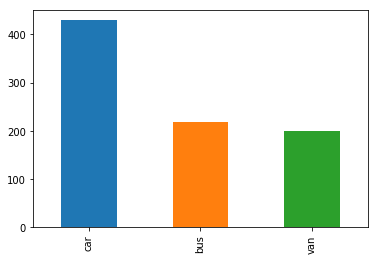

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.value_counts(vehicle_df["class"]).plot(kind="bar")

In [18]:
# Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.

In [19]:
vehicle_df.isnull().sum()

comp          0
circ          5
dis_cir       4
rad_R         6
prax_aspR     2
maxl_aspR     0
sca_R         1
elon          1
prax_rec      3
maxl_rec      0
scal_var      3
scal_var1     2
scal_radG     2
scal_radG1    4
skew          6
skew1         1
skew2         1
hol_R         0
class         0
dtype: int64

In [15]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
comp          846 non-null int64
circ          841 non-null float64
dis_cir       842 non-null float64
rad_R         840 non-null float64
prax_aspR     844 non-null float64
maxl_aspR     846 non-null int64
sca_R         845 non-null float64
elon          845 non-null float64
prax_rec      843 non-null float64
maxl_rec      846 non-null int64
scal_var      843 non-null float64
scal_var1     844 non-null float64
scal_radG     844 non-null float64
scal_radG1    842 non-null float64
skew          840 non-null float64
skew1         845 non-null float64
skew2         845 non-null float64
hol_R         846 non-null int64
class         846 non-null object
dtypes: float64(14), int64(4), object(1)
memory usage: 125.7+ KB


In [20]:
# we can see missing values for few attributes..hence replacing those with their median values..

In [21]:
for i in vehicle_df.columns[:17]:
    median_value = vehicle_df[i].median()
    vehicle_df[i] = vehicle_df[i].fillna(median_value)

In [22]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
comp          846 non-null int64
circ          846 non-null float64
dis_cir       846 non-null float64
rad_R         846 non-null float64
prax_aspR     846 non-null float64
maxl_aspR     846 non-null int64
sca_R         846 non-null float64
elon          846 non-null float64
prax_rec      846 non-null float64
maxl_rec      846 non-null int64
scal_var      846 non-null float64
scal_var1     846 non-null float64
scal_radG     846 non-null float64
scal_radG1    846 non-null float64
skew          846 non-null float64
skew1         846 non-null float64
skew2         846 non-null float64
hol_R         846 non-null int64
class         846 non-null object
dtypes: float64(14), int64(4), object(1)
memory usage: 125.7+ KB


In [23]:
vehicle_df.isnull().sum()

comp          0
circ          0
dis_cir       0
rad_R         0
prax_aspR     0
maxl_aspR     0
sca_R         0
elon          0
prax_rec      0
maxl_rec      0
scal_var      0
scal_var1     0
scal_radG     0
scal_radG1    0
skew          0
skew1         0
skew2         0
hol_R         0
class         0
dtype: int64

In [88]:
# Perform bi variate analysis including correlation, pairplots and state the inferences..

In [83]:
# Check for correlation of the variables..
vehicle_df.corr(method='pearson')

,comp,circ,dis_cir,rad_R,prax_aspR,maxl_aspR,sca_R,elon,prax_rec,maxl_rec,scal_var,scal_var1,scal_radG,scal_radG1,skew,skew1,skew2,hol_R
comp,1.000000,0.684887,0.789928,0.721925,0.192864,0.499928,0.812620,-0.788750,0.813694,0.676143,0.769871,0.806170,0.585243,-0.246681,0.197308,0.156348,0.298537,0.365552
circ,0.684887,1.000000,0.792320,0.638280,0.203253,0.560470,0.847938,-0.821472,0.843400,0.961318,0.802768,0.827462,0.925816,0.068745,0.136351,-0.009666,-0.104426,0.046351
dis_cir,0.789928,0.792320,1.000000,0.794222,0.244332,0.666809,0.905076,-0.911307,0.893025,0.774527,0.869584,0.883943,0.705771,-0.229353,0.099107,0.262345,0.146098,0.332732
rad_R,0.721925,0.638280,0.794222,1.000000,0.650554,0.463958,0.769941,-0.825392,0.744139,0.579468,0.786183,0.760257,0.550774,-0.390459,0.035755,0.179601,0.405849,0.491758
prax_aspR,0.192864,0.203253,0.244332,0.650554,1.000000,0.150295,0.194195,-0.298144,0.163047,0.147592,0.207101,0.196401,0.148591,-0.321070,-0.056030,-0.021088,0.400882,0.415734
maxl_aspR,0.499928,0.560470,0.666809,0.463958,0.150295,1.000000,0.490759,-0.504181,0.487931,0.642713,0.401391,0.463249,0.397397,-0.335444,0.081898,0.141664,0.083794,0.413174
sca_R,0.812620,0.847938,0.905076,0.769941,0.194195,0.490759,1.000000,-0.971601,0.989751,0.809083,0.960883,0.980447,0.799875,0.011314,0.064242,0.211647,0.005628,0.118817
elon,-0.788750,-0.821472,-0.911307,-0.825392,-0.298144,-0.504181,-0.971601,1.000000,-0.948996,-0.775854,-0.947644,-0.948851,-0.766314,0.078391,-0.046943,-0.183642,-0.115126,-0.216905
prax_rec,0.813694,0.843400,0.893025,0.744139,0.163047,0.487931,0.989751,-0.948996,1.000000,0.810934,0.947329,0.973606,0.796690,0.027545,0.073127,0.213801,-0.018649,0.099286
maxl_rec,0.676143,0.961318,0.774527,0.579468,0.147592,0.642713,0.809083,-0.775854,0.810934,1.000000,0.750222,0.789632,0.866450,0.053856,0.130702,0.004129,-0.103948,0.076770


In [89]:
# We can see compactness & circularity shows high significance with distance_circularity, radius_ratio, scatter_ratio, 
# pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance1, scaled_radiius_of_gyration.
# since circularity, radius, variance are dependent ones...we can see high correlation between theserelated attributes..

C:\Users\senthil_nathan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


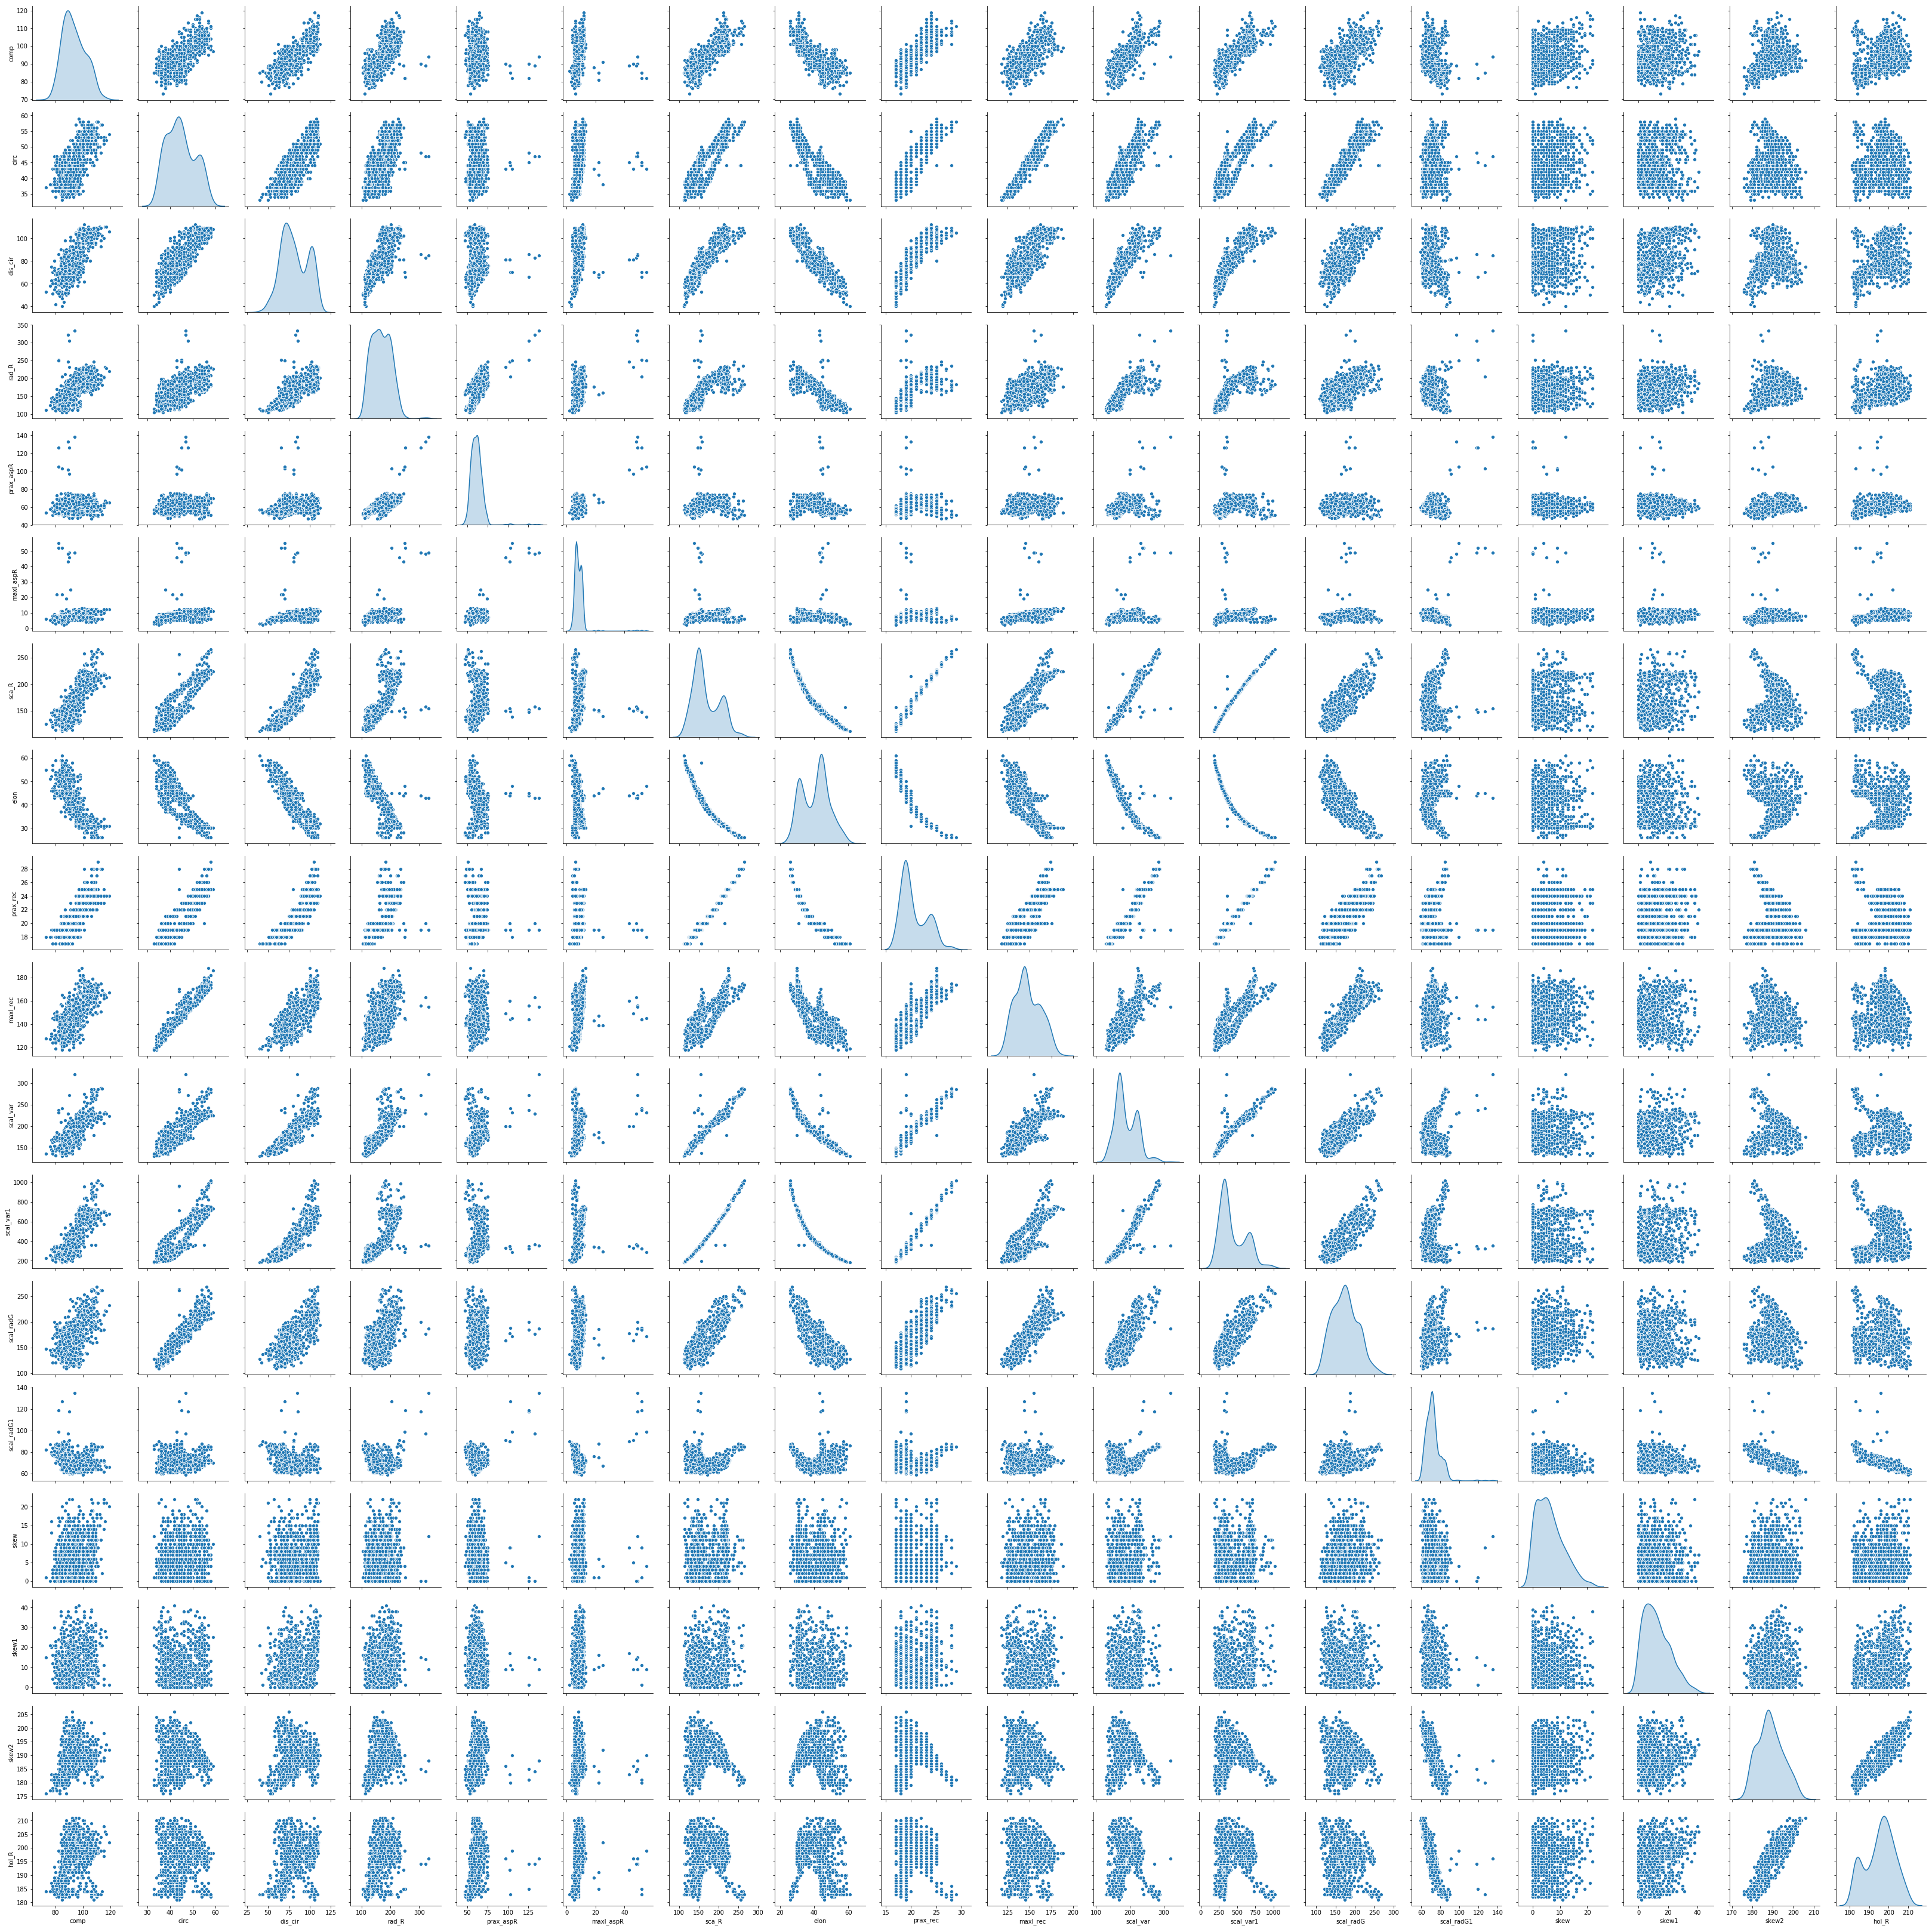

In [27]:
# Let us check for the pair plots..
sns.pairplot(vehicle_df,diag_kind='kde')

In [90]:
# Relationship between variables show good correlation between circularity , radius, variance related attributes..
# most of the attributes are right skewed..
# we can see visible two gaussians or clustering from most of the attributes..so there may be outliers in the dataset
# that has to be treated to get three gaussians/clusters..since we have three groups/segments in the target variable 'class'

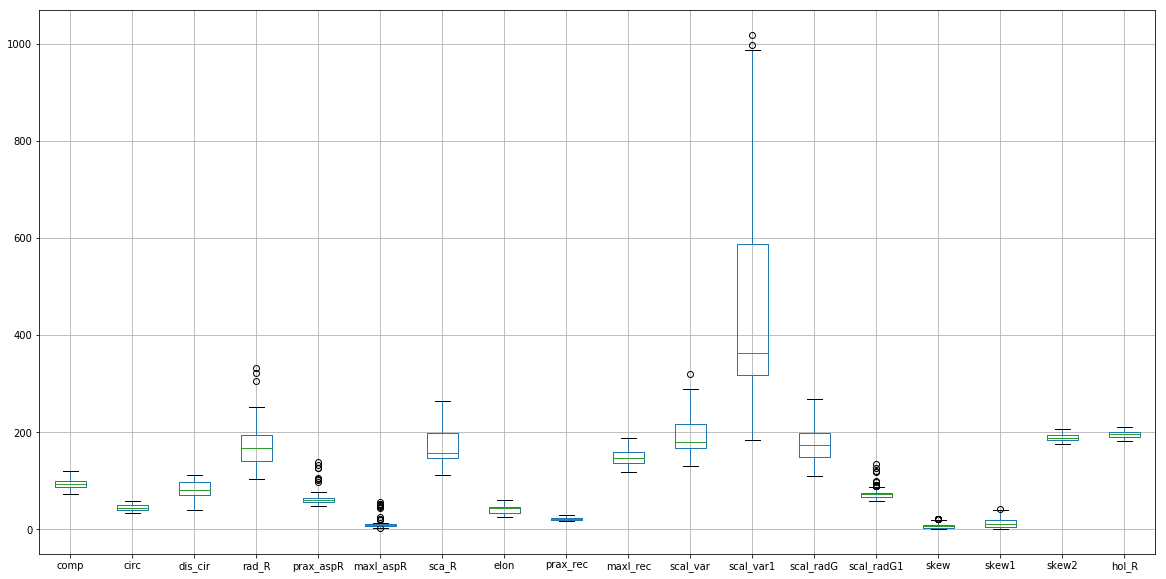

In [29]:
# Remove any unwanted columns or outliers, standardize variables in pre-processing step..lets use box plot for visualizing 
# the outliers..

vehicle_df.boxplot(figsize=(20,10))

In [30]:
# we could see few outliers here..hence it has to be treated before proceeding further...

In [31]:
for col_name in vehicle_df.columns[:-1]:
    q1 = vehicle_df[col_name].quantile(0.25)
    q3 = vehicle_df[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    
    vehicle_df.loc[(vehicle_df[col_name] < low) | (vehicle_df[col_name] > high), col_name] = vehicle_df[col_name].median()

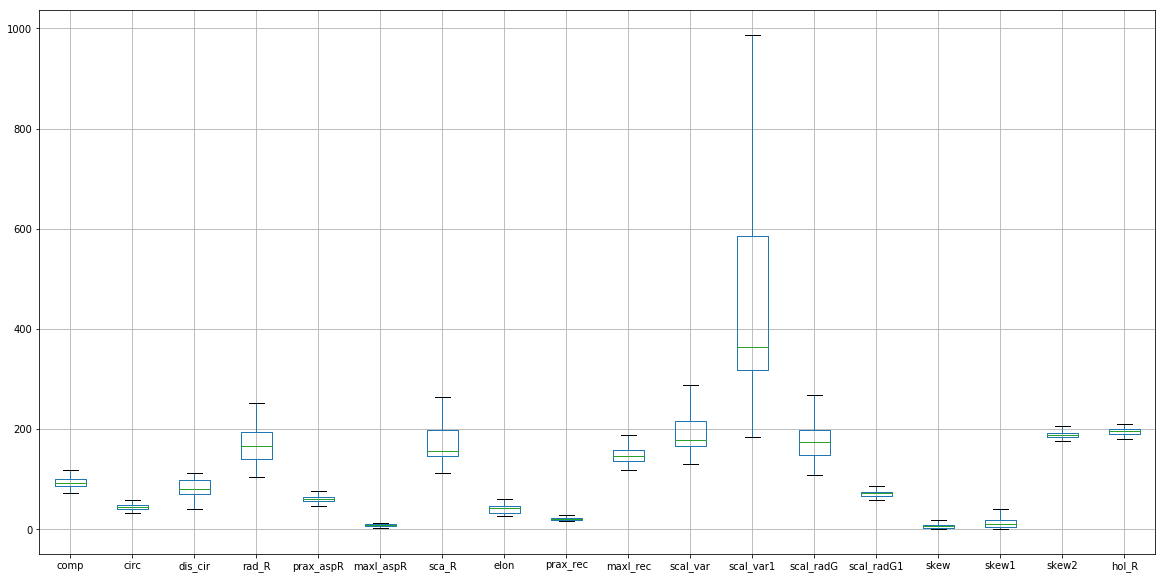

In [32]:
vehicle_df.boxplot(figsize=(20,10))

In [33]:
# now we can see visually the outliers are almost removed...

In [34]:
vehicle_df.head()

,comp,circ,dis_cir,rad_R,prax_aspR,maxl_aspR,sca_R,elon,prax_rec,maxl_rec,scal_var,scal_var1,scal_radG,scal_radG1,skew,skew1,skew2,hol_R,class
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,van
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,van
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,car
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,van
4,85.0,44.0,70.0,205.0,61.0,8.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,71.5,9.0,11.0,180.0,183.0,bus


In [35]:
# Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we 
#go for PCA. we can use zscore function to do this..

vehicle_sc = vehicle_df.drop('class', axis=1)

from scipy.stats import zscore
vehicle_sc_z = vehicle_sc.apply(zscore)

In [36]:
vehicle_sc_z.head()

,comp,circ,dis_cir,rad_R,prax_aspR,maxl_aspR,sca_R,elon,prax_rec,maxl_rec,scal_var,scal_var1,scal_radG,scal_radG1,skew,skew1,skew2,hol_R
0,0.160580,0.518073,0.057177,0.300945,1.933135,0.912212,-0.207598,0.136262,-0.224342,0.758332,-0.400771,-0.337407,0.285705,-0.315806,-0.032330,0.387162,-0.312012,0.183957
1,-0.325470,-0.623732,0.120741,-0.850666,-0.740596,0.427456,-0.599423,0.520519,-0.610886,-0.344578,-0.594220,-0.618623,-0.513630,0.009122,0.624090,0.161740,0.013265,0.452977
2,1.254193,0.844303,1.519141,1.265808,0.863642,0.912212,1.148719,-1.144597,0.935290,0.689401,1.114582,1.131806,1.392477,0.171586,1.718123,-0.401818,-0.149374,0.049447
3,-0.082445,-0.623732,-0.006386,-0.290423,0.328896,0.427456,-0.750125,0.648605,-0.610886,-0.344578,-0.916635,-0.739145,-1.466683,-1.453054,-0.032330,-0.289106,1.639649,1.529056
4,-1.054545,-0.134387,-0.769150,1.141310,-0.027601,-0.057300,-0.599423,0.520519,-0.610886,-0.275646,1.694930,-0.647319,0.408680,-0.072110,0.624090,-0.176395,-1.450481,-1.699181


In [37]:
vehicle_sc_z.shape

(846, 18)

In [38]:
# performing SVM Classification before doing PCA...

from sklearn.model_selection import train_test_split
Y = vehicle_df.iloc[:,18]
test_size = 0.3
X_train, X_test, Y_train, Y_test = train_test_split(vehicle_sc_z, Y, test_size=0.3, random_state=10)

In [39]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, Y_train)

C:\Users\senthil_nathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [40]:
y_pred = model.predict(X_test)

In [41]:
# checking for the accuracy score..

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, Y_test)

0.9606299212598425

In [43]:
# Performing PCA..
# Step 1 - Create covariance matrix

cov_matrix = np.cov(vehicle_sc_z.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00118343  0.68569786  0.79086299  0.72277977  0.1930925   0.50051942
   0.81358214 -0.78968322  0.81465658  0.67694334  0.77078163  0.80712401
   0.58593517 -0.24697246  0.19754181  0.1565327   0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.63903532  0.20349327  0.5611334
   0.8489411  -0.82244387  0.84439802  0.96245572  0.80371846  0.82844154
   0.92691166  0.06882659  0.13651201 -0.00967793 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.79516215  0.24462154  0.66759792
   0.90614687 -0.9123854   0.89408198  0.77544391  0.87061349  0.88498924
   0.70660663 -0.22962442  0.09922417  0.26265581  0.14627113  0.33312625]
 [ 0.72277977  0.63903532  0.79516215  1.00118343  0.65132393  0.46450748
   0.77085211 -0.82636872  0.74502008  0.58015378  0.78711387  0.76115704
   0.55142559 -0.39092105  0.03579728  0.17981316  0.40632957  0.49234013]
 [ 0.1930925   0.20349327  0.24462154  0.65132393  1.00118343  0.15047265
   0.19442484

In [44]:
# Step 2- Get eigen values and eigen vector

eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-2.72502890e-01 -8.70435783e-02  3.81852075e-02  1.38675013e-01
  -1.37101466e-01  2.63611383e-01  2.02717114e-01 -7.58796410e-01
   3.66685918e-01  1.60045219e-01  8.40252779e-02  2.14645175e-02
  -1.87350749e-02  6.89082276e-02  4.26105276e-02  9.97784975e-02
  -8.22590084e-02 -3.30366937e-02]
 [-2.87254690e-01  1.31621757e-01  2.01146908e-01 -3.80554832e-02
   1.38995553e-01 -7.13474241e-02 -3.92275358e-01 -6.76034223e-02
   5.53261885e-02 -1.82323962e-01 -3.65229874e-02  1.47247511e-01
  -4.89102355e-02  5.90534770e-02 -6.74107885e-01  1.63466948e-01
  -2.59100771e-01  2.48832011e-01]
 [-3.02421105e-01 -4.61430061e-02 -6.34621085e-02  1.08954287e-01
   8.00174278e-02 -1.69006151e-02  1.63371282e-01  2.77371950e-01
   7.46784853e-02  2.73033778e-01  4.68505530e-01  6.52730855e-01
   4.74162132e-03 -1.62108150e-01 -4.99754439e-04 -6.36582307e-02
   1.20629778e-01  9.80561531e-02]
 [-2.69713545e-01 -1.97931263e-01 -5.62851689e-02 -2.54355087e-01
  -1.33744367e-01 -

In [46]:
#  Find the variance and cumulative variance by each eigen vector..

tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 54.0993254   72.69242795  79.30893968  85.60048941  90.50578051
  94.2028816   95.96829741  97.23446089  97.96148159  98.40463444
  98.81191882  99.17047375  99.39323715  99.57233547  99.73544045
  99.86140541  99.97135127 100.        ]


In [48]:
# Lets find the Elbow point using the plot graph below..

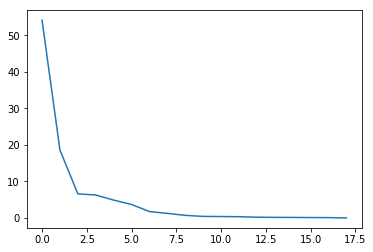

In [49]:
plt.plot(var_exp)

In [50]:
# Visually we can observe that their is steep drop in variance explained with increase in number of PC's.
# We will proceed with 9 components here. But depending on requirement 90% variation or 8 components will also do good..

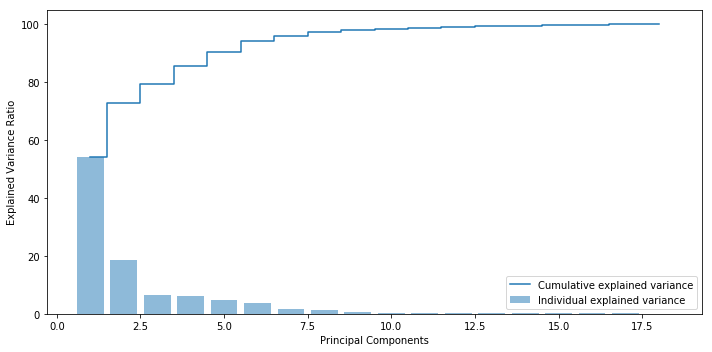

In [51]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [52]:
#  Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [53]:
vehicle_sc_z.shape

(846, 18)

In [54]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot

from sklearn.decomposition import PCA

# NOTE - we are generating only 9 PCA dimensions (dimensionality reduction from 18 to 9)

pca = PCA(n_components=9)
data_reduced = pca.fit_transform(vehicle_sc_z)
data_reduced.transpose()

array([[ 0.58422804, -1.5121798 ,  3.91344816, ...,  5.12009307,
        -3.29709502, -4.96759448],
       [-0.67567325, -0.34893367,  0.2345073 , ..., -0.18227007,
        -1.10194286,  0.42274968],
       [-0.45333356, -0.33343619, -1.26509352, ..., -0.50836783,
         1.93384417,  1.30871531],
       ...,
       [-0.18041487,  0.20330786,  0.81158817, ...,  0.88474898,
        -0.26057897, -0.39384302],
       [-0.68196902,  0.10442512,  0.17305277, ..., -0.38820845,
         0.45880709, -0.21433678],
       [ 0.31266966, -0.29625823,  0.19108534, ..., -0.07735512,
         0.82142229,  0.59676772]])

In [55]:
data_reduced.shape

(846, 9)

In [56]:
pca.components_

array([[ 0.27250289,  0.28725469,  0.30242111,  0.26971354,  0.09786073,
         0.19520014,  0.31052393, -0.3090069 ,  0.307287  ,  0.27815416,
         0.29976509,  0.30553237,  0.26323762, -0.04193594,  0.03608321,
         0.05872048,  0.03801314,  0.08474   ],
       [-0.08704358,  0.13162176, -0.04614301, -0.19793126, -0.25783995,
        -0.10804563,  0.07528535, -0.01322994,  0.0875602 ,  0.12215424,
         0.07726575,  0.07150302,  0.21058205,  0.50362158, -0.01576632,
        -0.09274624, -0.50162122, -0.50761211],
       [-0.03818521, -0.20114691,  0.06346211,  0.05628517, -0.06199275,
        -0.14895782,  0.10904283, -0.09085269,  0.1060705 , -0.21368469,
         0.1445998 ,  0.11034374, -0.20287019,  0.07386402, -0.55917399,
         0.6706805 , -0.06224071, -0.04170535],
       [ 0.13867501, -0.03805548,  0.10895429, -0.25435509, -0.61276572,
         0.27867816,  0.00539295,  0.06521486,  0.03089915,  0.04146747,
        -0.06400509, -0.00219687, -0.08553965, -0.115

In [57]:
#  Find correlation between components and features

In [58]:
df_comp = pd.DataFrame(pca.components_,columns=list(vehicle_sc_z))
df_comp.head()

,comp,circ,dis_cir,rad_R,prax_aspR,maxl_aspR,sca_R,elon,prax_rec,maxl_rec,scal_var,scal_var1,scal_radG,scal_radG1,skew,skew1,skew2,hol_R
0,0.272503,0.287255,0.302421,0.269714,0.097861,0.195200,0.310524,-0.309007,0.307287,0.278154,0.299765,0.305532,0.263238,-0.041936,0.036083,0.058720,0.038013,0.084740
1,-0.087044,0.131622,-0.046143,-0.197931,-0.257840,-0.108046,0.075285,-0.013230,0.087560,0.122154,0.077266,0.071503,0.210582,0.503622,-0.015766,-0.092746,-0.501621,-0.507612
2,-0.038185,-0.201147,0.063462,0.056285,-0.061993,-0.148958,0.109043,-0.090853,0.106070,-0.213685,0.144600,0.110344,-0.202870,0.073864,-0.559174,0.670680,-0.062241,-0.041705
3,0.138675,-0.038055,0.108954,-0.254355,-0.612766,0.278678,0.005393,0.065215,0.030899,0.041467,-0.064005,-0.002197,-0.085540,-0.115400,0.473703,0.428426,-0.027410,0.096037
4,0.137101,-0.138996,-0.080017,0.133744,0.123601,-0.634893,0.085557,-0.079073,0.081646,-0.251113,0.147471,0.110101,-0.005212,0.138069,0.566552,0.130870,0.180519,-0.110788


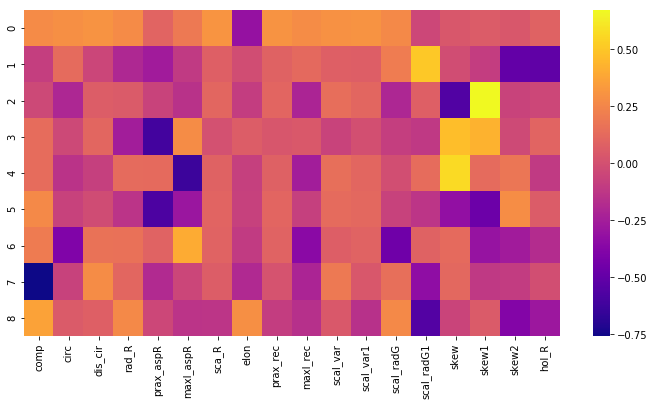

In [59]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [60]:
# performing SVM classification post PCA using dimensonality reduced dataset...

from sklearn.model_selection import train_test_split
Y = vehicle_df.iloc[:,18]
test_size = 0.3
X_train, X_test, Y_train, Y_test = train_test_split(data_reduced, Y, test_size=0.3, random_state=10)

In [61]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, Y_train)

C:\Users\senthil_nathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [62]:
y_pred = model.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, Y_test)

0.9606299212598425

In [81]:
# After trying the dimensionality reduction using PCA for 10,9,8,7,6 & 5...finally using 9 PCA dimensions we can get the same 
# accuracy level of 96% although we reduced the dimensionality from 18 to 9 attributes...

In [65]:
# Applying Grid SearchCV to find the best model and the best parameters..
from sklearn.model_selection import GridSearchCV

In [70]:
from sklearn.model_selection import train_test_split
Y = vehicle_df.iloc[:,18]
test_size = 0.3
X_train, X_test, Y_train, Y_test = train_test_split(data_reduced, Y, test_size=0.3, random_state=10)

In [71]:
from sklearn.svm import SVC
model = SVC()

In [72]:
parameters = [{'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear']},
              {'C': [0.01, 0.05, 0.5, 1], 'kernel': ['rbf']}]
grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, Y_train)

C:\Users\senthil_nathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\senthil_nathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [73]:
accuracy = grid_search.best_score_

In [74]:
accuracy

0.9425675675675675

In [75]:
grid_search.best_params_

{'C': 1, 'kernel': 'rbf'}

In [76]:
grid_search.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [77]:
# Fitting model with best parameters found using "GridSearchCV"

model = SVC(C=1, decision_function_shape='ovr', kernel='rbf')

In [78]:
model.fit(X_train, Y_train)

C:\Users\senthil_nathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [79]:
y_pred = model.predict(X_test)

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, Y_test)

0.9606299212598425

In [87]:
# We can see the same accuracy level of 96% is maintained for SVM before PCA and then reducing the dimensonality from 18 to 9
# using PCA and also using the GridsearchCV method...

In [91]:
# Thus all the project objectives and goals were completed with the above results.